## Exercise 2

For this exercise , you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you on D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. 


1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, and your final report.

4- Push your code and project to github and provide the link to your code here.



Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510

### SOLUTION

In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency
%matplotlib inline

In [4]:
titanic = pd.read_csv('C:\\Users\\User\\Documents\\PDD - Data analytics\\Computing for data analytics\\Python\\titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Hypothesis 1: Determine if the survival rate is associated to the class of passenger

Two-way table to visualize the frequency of the 2 categorical variables: survival rate and class of passenger

In [22]:
pclass_survived_freq = pd.crosstab(titanic['Survived'], titanic['Pclass'], margins = True)
pclass_survived_freq

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


Percentages of the pclass_survived table:

In [37]:
pclass_survived_pr = pd.crosstab(titanic['Survived'], titanic['Pclass'], normalize = True, margins = True)
pclass_survived_pr

Pclass,1,2,3,All
Survived,,,,
0,0.089787,0.108866,0.417508,0.616162
1,0.152637,0.097643,0.133558,0.383838
All,0.242424,0.206510,0.551066,1.000000


Create the bargraph to represent the relation between the variables:

<AxesSubplot:xlabel='Pclass', ylabel='count'>

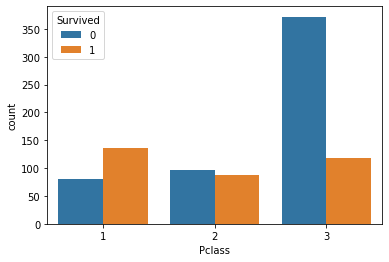

In [49]:
sns.countplot(x ='Pclass', hue ='Survived', data=titanic)

Apply the chi-square test to verify the independence of the two variables:

- Null hypothesis: Pclass variable and Survived variable are independence to each other.
- Alternative hypothesis: Pclass variable and Survived variable are not independence to each other.

In [106]:
stat, p, dof, expected = chi2_contingency(pclass_survived_freq)
print(f'chi-squared = {stat}\np value= {p}\ndegrees of freedom = {dof}')

chi-squared = 102.88898875696057
p value= 6.258462423531468e-20
degrees of freedom = 6


When the Degrees of Freedom is = 6, the corresponding Decision Point is = 12.59.

So Chi-Squared > DP

#### Conclusion Hypothesis 1:

Through the Chi-square Tesis we could identify that since the chi-squared result is greater than the decision point, we have enough evidence to reject the null hypothesis, which means that the Class of Passenger is associated with the Survival rate.
Additionally, in the graph and in the proportion table we can see that the people in the 3rd class had more probability of dying (Survived 0) than those in the other passenger class.

#### Hypothesis 2: Determine if the survival rate is associated to the gender

For this hypothesis, we will do the same process due to survival rate and gender are categorical variables: first of all, we have to create the two-way table to visualize the frequency.

In [79]:
gender_survived_freq = pd.crosstab(titanic['Survived'], titanic['Sex'], margins = True)
gender_survived_freq

Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


Percentages of the gender_survived table:

In [110]:
gender_survived_pr = pd.crosstab(titanic['Survived'], titanic['Sex'], normalize = True, margins = True)*100
gender_survived_pr

Sex,female,male,All
Survived,,,
0,9.090909,52.525253,61.616162
1,26.150393,12.233446,38.383838
All,35.241302,64.758698,100.000000


Create the heatmap to represent the relation between the variables:

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

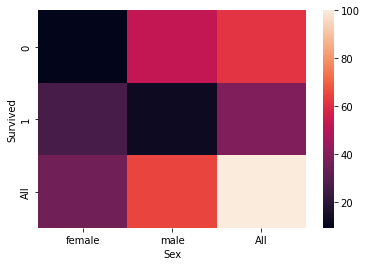

In [111]:
sns.heatmap(gender_survived_pr)

Apply the Chi-Square test to verify the independence of the two categorical variables:

- Null hypothesis: Gender variable and Survived variable are independence to each other.
- Alternative hypothesis: Gender variable and Survived variable are not independence to each other.

In [80]:
stat, p, dof, expected = chi2_contingency(gender_survived_freq)
print(f'chi-squared = {stat}\np value= {p}\ndegrees of freedom = {dof}')

chi-squared = 263.05057407065567
p value= 1.0036732821369117e-55
degrees of freedom = 4


When the Degrees of Freedom is = 4, the corresponding Decision Point is = 9.49.

So Chi-Squared > DP

#### Conclusion Hypothesis 2:
Through the Chi-square Tesis we could identify that since the chi-squared result is greater than the decision point, we have enough evidence to reject the Null Hypothesis, which means that the Gender (Sex) is strongly associated with the Survival rate. Furthemore, we could verify that if females had more than double of probability to survived than males.

#### Hypothesis 3: Determine the survival rate is associated to the age

Due to the variable has missing values, we will validate with a boxplot the values

<AxesSubplot:xlabel='Age'>

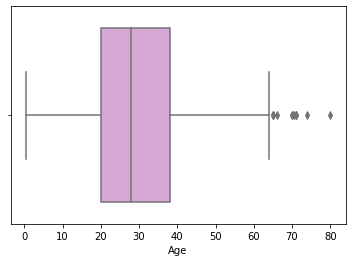

In [8]:
sns.boxplot(x = 'Age', data = titanic, color = 'plum')

In [11]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
age2 = titanic['Age']
def values_int(variables):
    for x in age2:
        if x < 1:
            x = x*100
    values(x)

In [30]:
titanic['Age'] = age2

In [31]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

In [35]:
titanic['Age'] = titanic['Age'].astype(int)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 80.2+ KB


In [38]:
age_survived_freq = pd.crosstab(titanic['Age'], titanic['Survived'])
age_survived_freq

Survived,0,1
Age,,
0,0,7
1,2,5
2,7,3
3,1,5
4,3,7
...,...,...
66,1,0
70,3,0
71,2,0


<AxesSubplot:xlabel='Age', ylabel='count'>

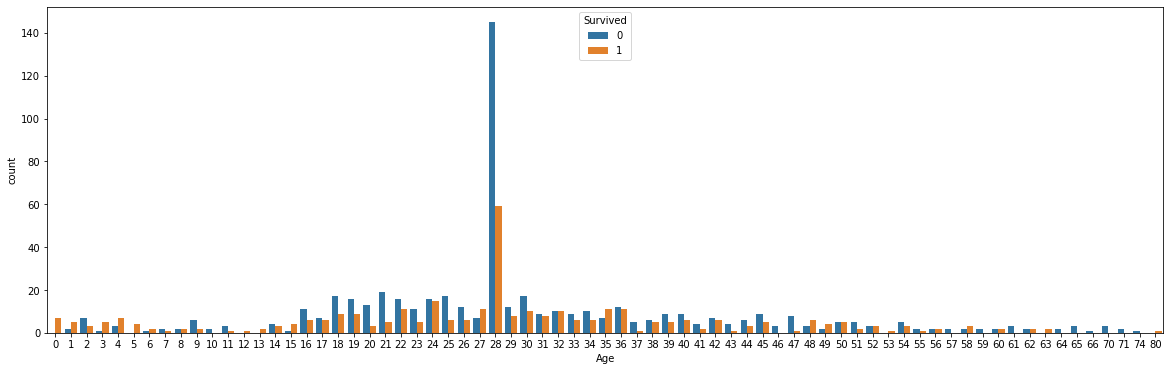

In [72]:
plt.figure(figsize = (20,6))
sns.countplot(x ='Age', hue ='Survived', data=titanic)

Apply the chi-square test to verify the independence of the two variables:

- Null hypothesis: Age variable and Survived variable are independence to each other.
- Alternative hypothesis: Age variable and Survived variable are not independence to each other.

In [77]:
stat, p, dof, expected = chi2_contingency(age_survived_freq)
print(f'chi-squared = {stat}\np value= {p}\ndegrees of freedom = {dof}')

chi-squared = 104.1119475596112
p value= 0.005097710349534984
degrees of freedom = 70


When the Degrees of Freedom is = 70, the corresponding Decision Point is = 79.71.

So Chi-Squared > DP

Through the Chi-square Tesis we could identify that since the chi-squared result is greater than the decision point, we have enough evidence to reject the Null Hypothesis, which means that Age is strongly associated with the Survival rate. Furthermore, we could verify in the graph that people in their 20s had more possibility to survive than people in other ranges.